In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
hr_data = pd.read_csv('hr_analytics_train.csv')
df = hr_data.copy()
df.set_index('employee_id', inplace=True)

In [3]:
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,
65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


# Data Exploration - Part 1

In [4]:
# Check the cols first
df.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [5]:
df = df.rename(columns = {"KPIs_met >80%":"KPIs_met_80", "awards_won?":"awards_won"}) 

In [17]:
'''
# employee_id is not needed - so discard it
emp_id = df['employee_id']
df = df.drop('employee_id', axis=1)'''

"\n# employee_id is not needed - so discard it\nemp_id = df['employee_id']\ndf = df.drop('employee_id', axis=1)"

In [6]:
# Now check the statistical description of the data
df.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_80,awards_won,avg_training_score,is_promoted
count,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [7]:
# check the missing data 
col_list = df.columns
missing_data_dict = {}
length = len(df)
for x in col_list:
    #print(x)
    
    missing_count = df[x].isnull().sum()
    percent = missing_count/length
    percent = percent * 100
    missing_data_dict[x] = percent
print(missing_data_dict)
# We can see only education & previous_year_rating has missing values but its very less,
# so we can not delete  any column
# we need to fill the values

{'department': 0.0, 'region': 0.0, 'education': 4.395343745438622, 'gender': 0.0, 'recruitment_channel': 0.0, 'no_of_trainings': 0.0, 'age': 0.0, 'previous_year_rating': 7.524448985549554, 'length_of_service': 0.0, 'KPIs_met_80': 0.0, 'awards_won': 0.0, 'avg_training_score': 0.0, 'is_promoted': 0.0}


## check the response varaible
The whole data set is highly imbalanced: we need to use SMOTE to get rid of this imbalance

In [8]:
print(df['is_promoted'].value_counts())
print(df['is_promoted'].value_counts()/len(df))

0    50140
1     4668
Name: is_promoted, dtype: int64
0    0.91483
1    0.08517
Name: is_promoted, dtype: float64


##### education
Now Education is having missing values. In the below lines of codes we have checked all the possibilities
of why this education is coming null. We can see almost it at complete random only. So, we can fill the 
missing value with the most frequent education category. i.e Bachelors

Now Master's degree and above has a higher probability of getting promoted
The most imp thing to consider is for below secondary the chances of getting 
promotion is higher than Bachelor's

In [10]:
df['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [11]:
print(df[df['education'].isnull()].is_promoted.value_counts())
print('Mean age where education is null :',np.mean(df[df['education'].isnull()].age))
print('Mean age: ', np.mean(df['age']))

print('Mean length of service where education is null :',np.mean(df[df['education'].isnull()].length_of_service))
print("mean length of service", np.mean(df['length_of_service']))
print('department wise: ',df[df['education'].isnull()].department.value_counts()/(df.department.value_counts())*100)

print(df[df['is_promoted']==1].education.value_counts()/(df.education.value_counts())*100)

0    2287
1     122
Name: is_promoted, dtype: int64
Mean age where education is null : 30.96886674968867
Mean age:  34.80391548679025
Mean length of service where education is null : 4.407222914072229
mean length of service 5.865512333965844
department wise:  Analytics            6.296712
Finance              1.419558
HR                   1.323408
Legal                0.384986
Operations           1.991540
Procurement          1.008686
R&D                  2.802803
Sales & Marketing    9.352732
Technology           1.386943
Name: department, dtype: float64
Bachelor's          8.203114
Master's & above    9.855946
Below Secondary     8.322981
Name: education, dtype: float64


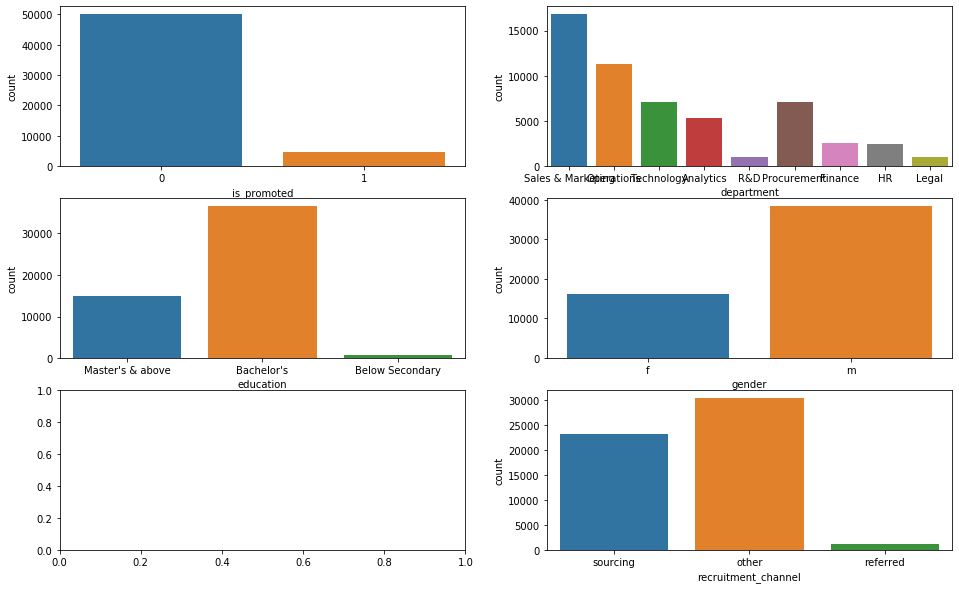

In [12]:
# bar charts - univariate analysis
fig, axes = plt.subplots(3,2, figsize=(16,10))
sns.countplot('is_promoted', data = df, ax =axes[0,0])
sns.countplot('department', data = df, ax =axes[0,1])
sns.countplot('education', data = df, ax =axes[1,0]) # Here we can see that Bachelor's the most frequest so we have to replace the missing vals with bachelors
#sns.countplot('region', data = df, ax =axes[1,0])
sns.countplot('gender', data = df, ax =axes[1,1])
sns.countplot('recruitment_channel', data = df, ax =axes[2,1])

plt.show()

##### department
No null value here.

For Technology, Ops, Proc & Analytics - the propbability of getting promoted is higher
so, this feature is absolutely valuable in determining the promotion prob.

In [13]:
# department
print(df[df['is_promoted']==1].department.value_counts()/ (df.department.value_counts()) *100)
print(df[df['is_promoted']==0].department.value_counts()/ (df.department.value_counts()) *100)
#sns.countplot('department', data = df, hue = 'is_promoted')
print(df['department'].value_counts()/len(df))
# Insights: For Technology, Analytics ,Procuremnt, Operations are the depts where the promotion percentage is higher

Analytics             9.566517
Finance               8.123028
HR                    5.624483
Legal                 5.101059
Operations            9.014804
Procurement           9.638554
R&D                   6.906907
Sales & Marketing     7.203088
Technology           10.759316
Name: department, dtype: float64
Sales & Marketing    92.796912
Operations           90.985196
Procurement          90.361446
Technology           89.240684
Analytics            90.433483
Finance              91.876972
HR                   94.375517
Legal                94.898941
R&D                  93.093093
Name: department, dtype: float64
Sales & Marketing    0.307254
Operations           0.207050
Procurement          0.130236
Technology           0.130236
Analytics            0.097650
Finance              0.046271
HR                   0.044118
Legal                0.018957
R&D                  0.018227
Name: department, dtype: float64


##### gender
For female candidates the chance of getting promoted is higher than the male employees

In [14]:
df[df['is_promoted']==1].gender.value_counts()/df.gender.value_counts() *100

m    8.315150
f    8.993379
Name: gender, dtype: float64

##### recruitment_channel
For referred candidates the chance of getting promoted is higher

In [100]:
'''print(df[df['is_promoted']==1].recruitment_channel.value_counts()/ len(df[df['is_promoted']==1]))
print(df[df['is_promoted']==0].recruitment_channel.value_counts()/ len(df[df['is_promoted']==0]))
print(df.recruitment_channel.value_counts()/len(df))


rec_chnl_df_promo1 = df[df['is_promoted']==1].recruitment_channel.value_counts()/df.recruitment_channel.value_counts()
rec_chn_df = (df.recruitment_channel.value_counts()/len(df))
#rec_chn_df.plot(kind='bar', figsize=(16,6), color='green', width=.2)
#rec_chnl_df_promo1.plot(kind='bar', figsize=(16,6), color='blue')

N = np.arange(3)

print(N)

ax1 = plt.subplot(111)
w=0.3

plt.xticks(N+w/2, rec_chnl_df_promo1.index, rotation='vertical')
promo1_rec_chn = ax1.bar(N,df[df['is_promoted']==1].recruitment_channel.value_counts()/df.recruitment_channel.value_counts(),
             width=w, color='b', align='center', )

ax2 = ax1.twinx()

rec_chn = ax2.bar(N+w ,df.recruitment_channel.value_counts()/len(df),
             width=w, color='g', align='center')
plt.legend([promo1_rec_chn, rec_chn],['Rec Channel when Promoted', 'Rec Channel Distribution'])

plt.ylabel('Rec_channel_distribution')
plt.show()
'''

"print(df[df['is_promoted']==1].recruitment_channel.value_counts()/ len(df[df['is_promoted']==1]))\nprint(df[df['is_promoted']==0].recruitment_channel.value_counts()/ len(df[df['is_promoted']==0]))\nprint(df.recruitment_channel.value_counts()/len(df))\n\n\nrec_chnl_df_promo1 = df[df['is_promoted']==1].recruitment_channel.value_counts()/df.recruitment_channel.value_counts()\nrec_chn_df = (df.recruitment_channel.value_counts()/len(df))\n#rec_chn_df.plot(kind='bar', figsize=(16,6), color='green', width=.2)\n#rec_chnl_df_promo1.plot(kind='bar', figsize=(16,6), color='blue')\n\nN = np.arange(3)\n\nprint(N)\n\nax1 = plt.subplot(111)\nw=0.3\n\nplt.xticks(N+w/2, rec_chnl_df_promo1.index, rotation='vertical')\npromo1_rec_chn = ax1.bar(N,df[df['is_promoted']==1].recruitment_channel.value_counts()/df.recruitment_channel.value_counts(),\n             width=w, color='b', align='center', )\n\nax2 = ax1.twinx()\n\nrec_chn = ax2.bar(N+w ,df.recruitment_channel.value_counts()/len(df),\n             wid

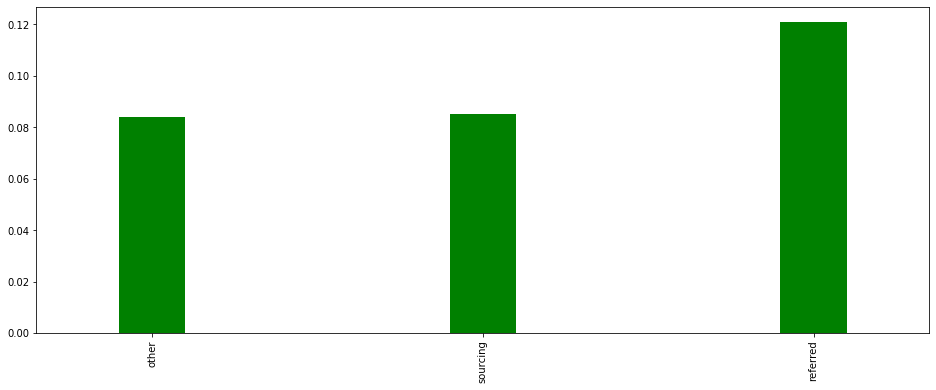

In [119]:
rec_chnl_df_promo1 = df[df['is_promoted']==1].recruitment_channel.value_counts()/df.recruitment_channel.value_counts()
rec_chnl_df_promo1.plot(kind='bar', figsize=(16,6), color='green', width=.2)

#(kind='bar', figsize=(16,6), color='blue', width=0.2, ax=ax1)

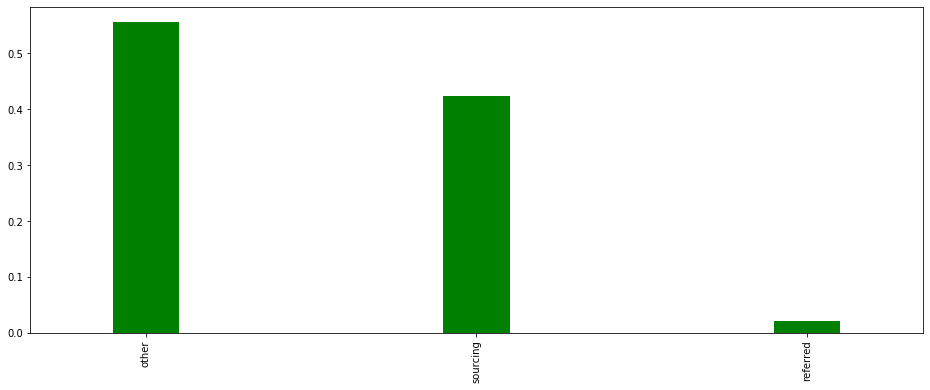

In [102]:
rec_chn_df = (df.recruitment_channel.value_counts()/len(df))
rec_chn_df.plot(kind='bar', figsize=(16,6), color='green', width=.2)

##### KPI met 80%
we can clearly see that a person with kpi > 80 % has a better chance of getting promoted

In [16]:
df = df.rename({'KPIs_met >80%':'kpi_met_80'}, axis=1)

In [17]:
# KPIs_met >80%

print(df.columns)
df[df['is_promoted']==1].kpi_met_80.value_counts()/ (df.kpi_met_80.value_counts())

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met_80', 'awards_won', 'avg_training_score', 'is_promoted'],
      dtype='object')


AttributeError: 'DataFrame' object has no attribute 'kpi_met_80'

##### avg_training_score
This is on a higher side when the person is getting promoted - which is logical

Max Training score: when promoted 99
Max Training score: when not promoted 96
Avg. Training score when not promoted 62.64768647786199
Avg. Training score when promoted 71.32519280205655


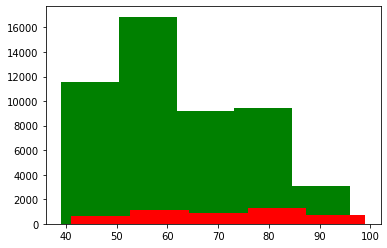

In [18]:
plt.hist(df[df['is_promoted']==0].avg_training_score, bins=5, color = 'green')
plt.hist(df[df['is_promoted']==1].avg_training_score, bins=5, color='red')



print('Max Training score: when promoted',df[df['is_promoted']==1].avg_training_score.max())
print('Max Training score: when not promoted',df[df['is_promoted']==0].avg_training_score.max())
print('Avg. Training score when not promoted',df[df['is_promoted']<1]['avg_training_score'].mean())
print('Avg. Training score when promoted',df[df['is_promoted']>0]['avg_training_score'].mean())

##### no_of_trainings
Persons who have done more trainings are less likely to get promoted. This is surprising.

Max Trainings when Not Promoted:  10
Min Trainings when Not Promoted::  1
Average Trainings when Not Promoted::  1.257638611886717
Max Trainings when  Promoted:  6
Min Trainings when  Promoted::  1
Average Trainings when  Promoted::  1.203299057412168


(array([3910.,  605.,  122.,   26.,    5.]),
 array([1., 2., 3., 4., 5., 6.]),
 <a list of 5 Patch objects>)

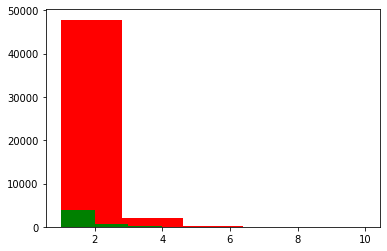

In [20]:
#no_of_trainings
print("Max Trainings when Not Promoted: ",df[df['is_promoted']<1]['no_of_trainings'].max())
print("Min Trainings when Not Promoted:: ",df[df['is_promoted']<1]['no_of_trainings'].min())
print("Average Trainings when Not Promoted:: ",df[df['is_promoted']<1]['no_of_trainings'].mean())

print("Max Trainings when  Promoted: ",df[df['is_promoted']>0]['no_of_trainings'].max())
print("Min Trainings when  Promoted:: ",df[df['is_promoted']>0]['no_of_trainings'].min())
print("Average Trainings when  Promoted:: ",df[df['is_promoted']>0]['no_of_trainings'].mean())

plt.hist(df[df['is_promoted']<1]['no_of_trainings'], bins=5, color='red')
plt.hist(df[df['is_promoted']>0]['no_of_trainings'], bins=5, color='green')



##### age 
the age distribution is similar for promoted and not promoted
Slightly higher when not Promoted

Avg. age Not Promoted:  34.84403669724771
Avg. age when  Promoted:  34.372964867180805


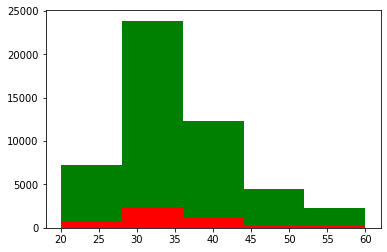

In [21]:
#Age
plt.hist(df[df['is_promoted']==0]['age'], bins=5, color = 'green')
plt.hist(df[df['is_promoted']==1]['age'], bins=5, color='red')


print("Avg. age Not Promoted: ",df[df['is_promoted']==0]['age'].mean())
print("Avg. age when  Promoted: ",df[df['is_promoted']==1]['age'].mean())

plt.show()


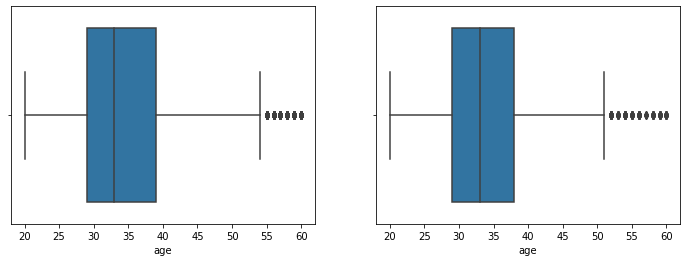

In [22]:
fig, axes = plt.subplots(1,2, figsize=(12,4))
sns.boxplot(x=df[df['is_promoted']<1]['age'], ax=axes[0])
sns.boxplot(x=df[df['is_promoted']>0]['age'],ax=axes[1])

##### length_of_service 
There is no such difference in case of Length of service with the promoted or not promoted
Length of Service is slightly lower when promoted

34
37
1
1
5.716366752356469
5.879397686477862


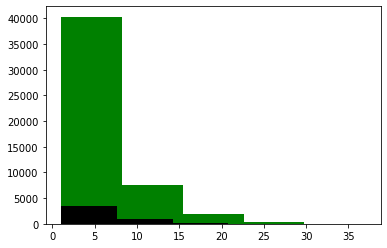

In [23]:
#
plt.hist(df[df['is_promoted']==0]['length_of_service'], bins=5, color='green')
plt.hist(df[df['is_promoted']==1]['length_of_service'], bins=5, color='black')

print(df[df['is_promoted']==1]['length_of_service'].max())
print(df[df['is_promoted']==0]['length_of_service'].max())
print(df[df['is_promoted']==1]['length_of_service'].min())
print(df[df['is_promoted']==0]['length_of_service'].min())
print(df[df['is_promoted']==1]['length_of_service'].mean())
print(df[df['is_promoted']==0]['length_of_service'].mean())



###### previous_year_rating
This is a highly deciding variable
we can see 50 % of the candidates who got promoted are having 4+ rating perevious year
where as none of the not promoted person got a rating above 4

max rating while promoted 5.0
max rating while promoted 5.0
max rating while promoted 1.0
max rating while promoted 1.0


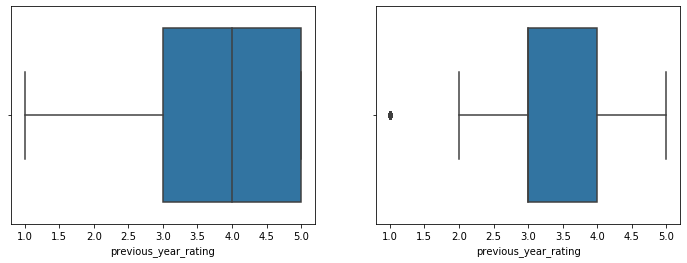

In [24]:
# previous_year_rating

print('max rating while promoted', df[df['is_promoted']==1].previous_year_rating.max())
print('max rating while promoted', df[df['is_promoted']==0].previous_year_rating.max())

print('max rating while promoted', df[df['is_promoted']==1].previous_year_rating.min())
print('max rating while promoted', df[df['is_promoted']==0].previous_year_rating.min())


fig, axes = plt.subplots(1,2, figsize=(12,4))

sns.boxplot(x=df[df['is_promoted']==1]['previous_year_rating'], ax=axes[0])
sns.boxplot(x=df[df['is_promoted']==0]['previous_year_rating'],ax=axes[1])
# Insights: we can clearly see that those got promoted has the higher previous rating
# upper 50% of the population who got promoted have prev rating >= 4
# mean rating of the promoted persons are closer to 4

In [25]:
print(df[df['is_promoted']==1].previous_year_rating.value_counts()/len(df[df['is_promoted']==1]))

print(df[df['is_promoted']==0].previous_year_rating.value_counts()/len(df[df['is_promoted']==0]))

5.0    0.411525
3.0    0.290274
4.0    0.167952
2.0    0.038775
1.0    0.018852
Name: previous_year_rating, dtype: float64
3.0    0.344296
5.0    0.195852
4.0    0.181352
1.0    0.122357
2.0    0.080654
Name: previous_year_rating, dtype: float64


In [26]:
print(df[df['is_promoted']==1]['previous_year_rating'].mean())
print(df[df['is_promoted']==0]['previous_year_rating'].mean())

3.986139986139986
3.267910689246036


In [27]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'kpi_met_80', 'awards_won?', 'avg_training_score',
       'is_promoted'],
      dtype='object')

In [29]:
print(df.previous_year_rating.isnull().sum())

print(df[df['previous_year_rating'].isnull()].is_promoted.value_counts()/len(df[df['previous_year_rating'].isnull()]))
print(df[df['previous_year_rating'].notnull()].is_promoted.value_counts()/len(df[df['previous_year_rating'].notnull()]))

print(" mean prev. yr rating while promoted : ",np.mean(df[df['is_promoted']==1].previous_year_rating))
print(" mean prev. yr rating while not promoted : ",np.mean(df[df['is_promoted']==0].previous_year_rating))

4124
0    0.917798
1    0.082202
Name: is_promoted, dtype: float64
0    0.914588
1    0.085412
Name: is_promoted, dtype: float64
 mean prev. yr rating while promoted :  3.986139986139986
 mean prev. yr rating while not promoted :  3.267910689246036


##### awards_won

If the person has won an award, then the chance of getting a promotion gets higher

In [30]:
df = df.rename({'awards_won?':'awards_won'}, axis =1)

In [31]:
print(df['awards_won'].value_counts())

print(df[df['is_promoted']==1].awards_won.value_counts()/df.awards_won.value_counts() * 100)
print(df[df['is_promoted']==0].awards_won.value_counts()/df.awards_won.value_counts() * 100)

0    53538
1     1270
Name: awards_won, dtype: int64
0     7.674922
1    44.015748
Name: awards_won, dtype: float64
0    92.325078
1    55.984252
Name: awards_won, dtype: float64


##### region

This is a good indicator, coz there are several regions from where all the candidates got promotion and some rregions 
with nill promotion

In [32]:
np.arange(len(df[df['is_promoted']==0].region.unique()))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

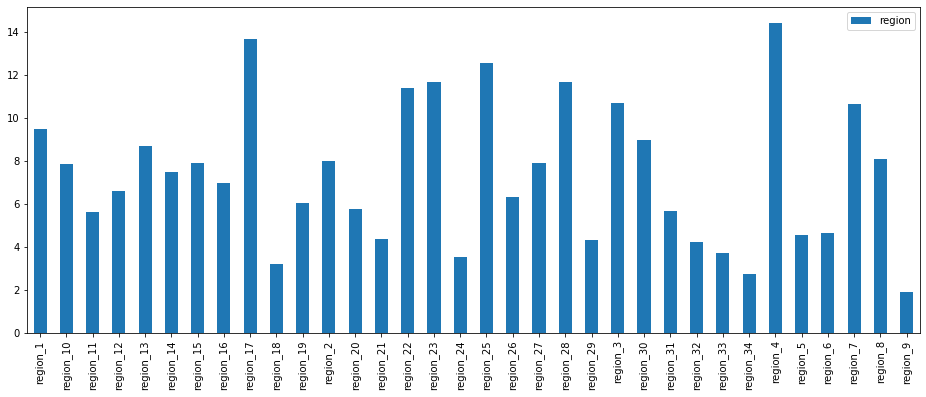

In [49]:
df.region.value_counts()

region_df = pd.DataFrame((df[df['is_promoted']==1].region.value_counts()/df.region.value_counts())*100)
region_df
region_df.plot(kind='bar', figsize=(16,6))
#plt.bar(region_df)
#plt.bar()

#plt.bar((df[df['is_promoted']==1].region.value_counts()/df.region.value_counts())*100)

34


[Text(0, 0, 'region_7'),
 Text(0, 0, 'region_22'),
 Text(0, 0, 'region_19'),
 Text(0, 0, 'region_23'),
 Text(0, 0, 'region_26'),
 Text(0, 0, 'region_2'),
 Text(0, 0, 'region_20'),
 Text(0, 0, 'region_34'),
 Text(0, 0, 'region_1'),
 Text(0, 0, 'region_4'),
 Text(0, 0, 'region_29'),
 Text(0, 0, 'region_31'),
 Text(0, 0, 'region_15'),
 Text(0, 0, 'region_14'),
 Text(0, 0, 'region_11'),
 Text(0, 0, 'region_5'),
 Text(0, 0, 'region_28'),
 Text(0, 0, 'region_17'),
 Text(0, 0, 'region_13'),
 Text(0, 0, 'region_16'),
 Text(0, 0, 'region_25'),
 Text(0, 0, 'region_10'),
 Text(0, 0, 'region_27'),
 Text(0, 0, 'region_30'),
 Text(0, 0, 'region_12'),
 Text(0, 0, 'region_21'),
 Text(0, 0, 'region_8'),
 Text(0, 0, 'region_32'),
 Text(0, 0, 'region_6'),
 Text(0, 0, 'region_33'),
 Text(0, 0, 'region_24'),
 Text(0, 0, 'region_3'),
 Text(0, 0, 'region_9'),
 Text(0, 0, 'region_18')]

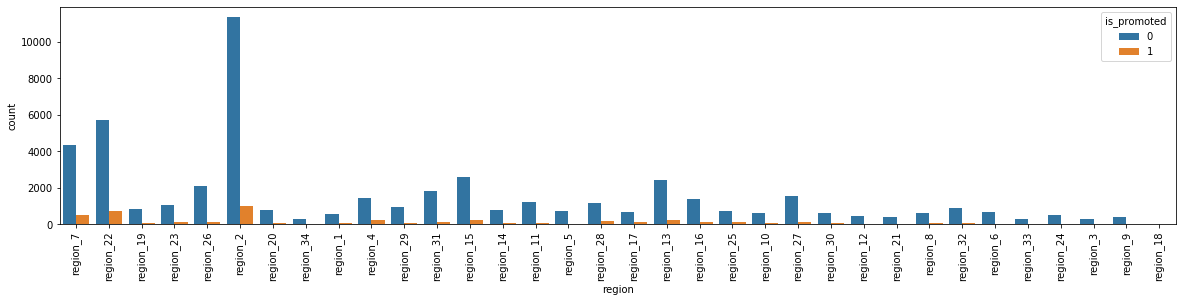

In [33]:
#print(df['region'].value_counts())
fig, axes = plt.subplots(figsize=(20,4))
print(len(df['region'].unique()))
#x = np.arange(df[df['is_promoted']==0].region.unique())
chart = sns.countplot('region', data = df, hue='is_promoted', orient="v")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
#plt.bar(x, df[df['is_promoted']==0].region.value_counts(), color='green')

#plt.bar(df[df['is_promoted']==1].region.unique(), df[df['is_promoted']==1].region.value_counts(), color='red')


In [34]:
#df[df['region']=='region_19'].is_promoted.value_counts()
#df[df['region']=='region_30'].is_promoted.value_counts()
#df[df['region']=='region_18'].is_promoted.value_counts()
print(df[df['region']=='region_2'].is_promoted.value_counts())
print(df[df['region']=='region_22'].is_promoted.value_counts())
print(len(df[df['region']=='region_7']))

0    11354
1      989
Name: is_promoted, dtype: int64
0    5694
1     734
Name: is_promoted, dtype: int64
4843


In [39]:
print(df[df['is_promoted']==0].region.value_counts()/df['region'].value_counts()*100)
print(df[df['is_promoted']==1].region.value_counts()/df['region'].value_counts()*100)


region_1     90.491803
region_10    92.129630
region_11    94.372624
region_12    93.400000
region_13    91.314199
region_14    92.503023
region_15    92.094017
region_16    93.037543
region_17    86.306533
region_18    96.774194
region_19    93.935927
region_2     91.987361
region_20    94.235294
region_21    95.620438
region_22    88.581207
region_23    88.340426
region_24    96.456693
region_25    87.423687
region_26    93.672566
region_27    92.103677
region_28    88.315630
region_29    95.674044
region_3     89.306358
region_30    91.019787
region_31    94.315245
region_32    95.767196
region_33    96.282528
region_34    97.260274
region_4     85.554903
region_5     95.430809
region_6     95.362319
region_7     89.345447
region_8     91.908397
region_9     98.095238
Name: region, dtype: float64
region_1      9.508197
region_10     7.870370
region_11     5.627376
region_12     6.600000
region_13     8.685801
region_14     7.496977
region_15     7.905983
region_16     6.962457
regio

# Missing value treatment

In [4]:
# fill education missing values with bachelors'
df['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [5]:
df['education'].fillna("Bachelor's", inplace = True)

In [6]:
df.education.isnull().sum()

0

3.329082313058271
5.0
5.0
1.0


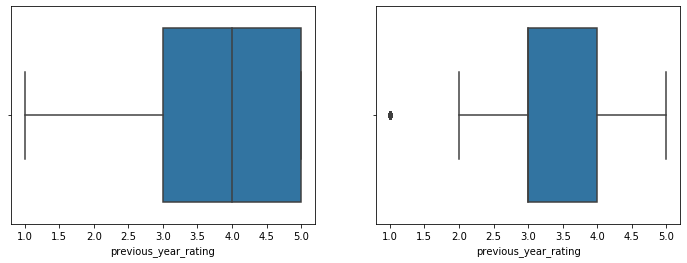

In [24]:
'''copy_df = df.copy()
copy_df.previous_year_rating.isnull().sum()
copy_df['previous_year_rating'] = copy_df.apply(
    lambda row: 3.267910689246036 if np.isnan(row['previous_year_rating']) and row['is_promoted']==0 
    else (3.986139986139986 if np.isnan(row['previous_year_rating']) and row['is_promoted']==1 else row['previous_year_rating'])
    , axis=1)

print(np.mean(copy_df.previous_year_rating))
print(df.previous_year_rating.max())
print(copy_df.previous_year_rating.max())
print(copy_df.previous_year_rating.min())
fig, axes = plt.subplots(1,2, figsize=(12,4))

sns.boxplot(x=copy_df[copy_df['is_promoted']==1]['previous_year_rating'], ax=axes[0])
sns.boxplot(x=copy_df[copy_df['is_promoted']==0]['previous_year_rating'],ax=axes[1])'''


In [8]:
'''copy_df['previous_year_rating'] = copy_df.apply(
    lambda row: 3.267910689246036 if np.isnan(row['previous_year_rating']) and row['is_promoted']==0 
    else (3.986139986139986 if np.isnan(row['previous_year_rating']) and row['is_promoted']==1 else row['previous_year_rating'])
    , axis=1)
copy_df['previous_year_rating'].min() '''

"copy_df['previous_year_rating'] = copy_df.apply(\n    lambda row: 3.267910689246036 if np.isnan(row['previous_year_rating']) and row['is_promoted']==0 \n    else (3.986139986139986 if np.isnan(row['previous_year_rating']) and row['is_promoted']==1 else row['previous_year_rating'])\n    , axis=1)\ncopy_df['previous_year_rating'].min() "

In [9]:
# Filling missing values: we have filled previous_yr_rating missing values with 3.9 if is_promoted = 1 else 3.26

df['previous_year_rating'] = df.apply(
    lambda row: 3.267910689246036 if np.isnan(row['previous_year_rating']) and row['is_promoted']==0 
    else (3.986139986139986 if np.isnan(row['previous_year_rating']) and row['is_promoted']==1 else row['previous_year_rating'])
    , axis=1)

In [10]:
df.previous_year_rating.isnull().sum()

0

In [11]:
print(np.mean(df.previous_year_rating))
print(df.previous_year_rating.max())
print(df.previous_year_rating.max())
print(df.previous_year_rating.min())


3.329082313058271
5.0
5.0
1.0


In [12]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

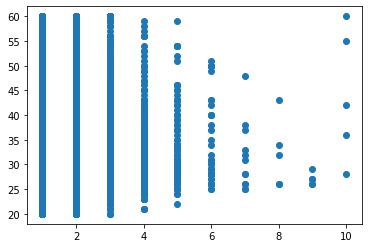

In [19]:
plt.scatter(df['no_of_trainings'], df['age'])

In [55]:
df2 = df.drop(columns=['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel','is_promoted'])

##### checking with correlation
we can see that KPI met, awards won and average training score are correlated 

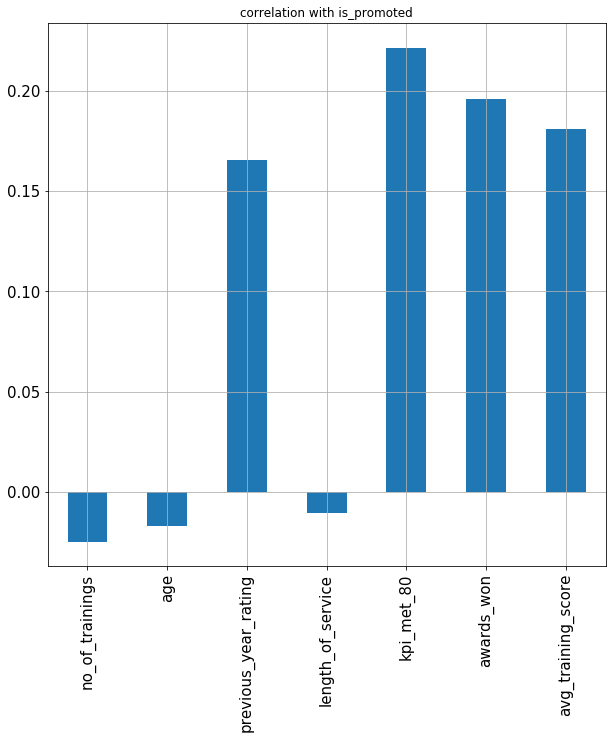

In [56]:
df2.corrwith(df.is_promoted).plot.bar(figsize=(10,10), fontsize=15, grid=True, title="correlation with is_promoted")

In [57]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'kpi_met_80', 'awards_won', 'avg_training_score',
       'is_promoted'],
      dtype='object')

##### correlation matrix
We can see that only age is highly correlated with the length of service, which is logical
again for the previous_yr_rating is correlated with kpi met 80%

In [58]:
# correlation matrix
df3 = df.drop(columns=['is_promoted', 'employee_id'])

(54808, 12)
                      no_of_trainings       age  previous_year_rating  \
no_of_trainings              1.000000 -0.081278             -0.060133   
age                         -0.081278  1.000000              0.005973   
previous_year_rating        -0.060133  0.005973              1.000000   
length_of_service           -0.057275  0.657111              0.000402   
kpi_met_80                  -0.045576 -0.025592              0.340501   
awards_won                  -0.007628 -0.008169              0.028805   
avg_training_score           0.042517 -0.048380              0.074342   

                      length_of_service  kpi_met_80  awards_won  \
no_of_trainings               -0.057275   -0.045576   -0.007628   
age                            0.657111   -0.025592   -0.008169   
previous_year_rating           0.000402    0.340501    0.028805   
length_of_service              1.000000   -0.077693   -0.039927   
kpi_met_80                    -0.077693    1.000000    0.097000   
a

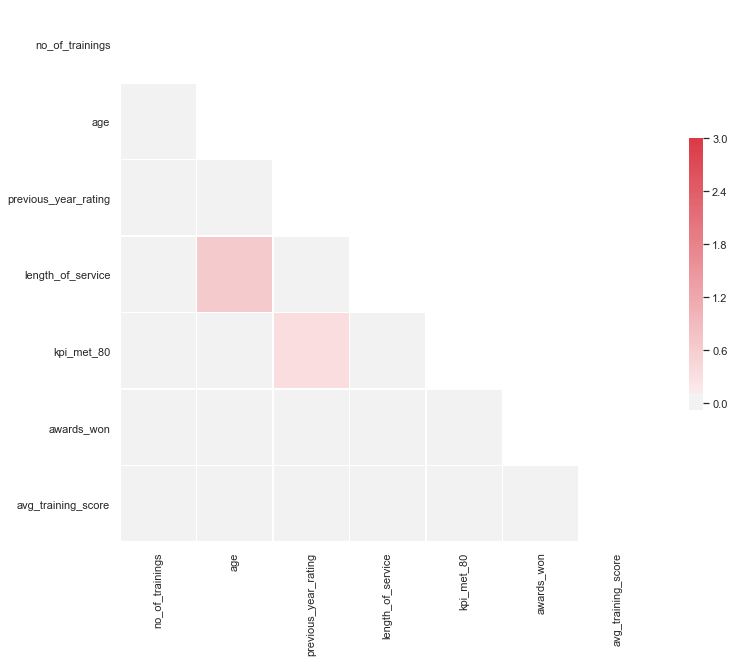

In [59]:
# now we will be building the correlation matrix
# take copy paste code
sns.set(style='white')
print(df3.shape)
# compute the correlation matrix
corr = df3.corr()
print(corr)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize = (12,10))

# generate a custom diverging color map
cmap = sns.diverging_palette(220,10,as_cmap = True)
sns.heatmap(corr,mask=mask, cmap = cmap, vmax=3, 
           center=0, square=True, linewidths = .5,cbar_kws={"shrink":.5})


# Data Pre Processing - 2

- Take emp id col out
- one hot encoding for dept, region, gender, education, recruitment_channel

In [13]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [14]:
emp_id = df['employee_id']

In [15]:
df = df.drop(columns=['employee_id'])

In [16]:
df = pd.get_dummies(df, drop_first=True)

In [17]:
df.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_10,region_region_11,region_region_12,region_region_13,region_region_14,region_region_15,region_region_16,region_region_17,region_region_18,region_region_19,region_region_2,region_region_20,region_region_21,region_region_22,region_region_23,region_region_24,region_region_25,region_region_26,region_region_27,region_region_28,region_region_29,region_region_3,region_region_30,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,1,35,5.0,8,1,0,49,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
1,1,30,5.0,4,0,0,60,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,34,3.0,7,0,0,50,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,2,39,1.0,10,0,0,50,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,45,3.0,2,0,0,73,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [18]:
df.shape

(54808, 54)

In [19]:
df.columns

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted',
       'department_Finance', 'department_HR', 'department_Legal',
       'department_Operations', 'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology',
       'region_region_10', 'region_region_11', 'region_region_12',
       'region_region_13', 'region_region_14', 'region_region_15',
       'region_region_16', 'region_region_17', 'region_region_18',
       'region_region_19', 'region_region_2', 'region_region_20',
       'region_region_21', 'region_region_22', 'region_region_23',
       'region_region_24', 'region_region_25', 'region_region_26',
       'region_region_27', 'region_region_28', 'region_region_29',
       'region_region_3', 'region_region_30', 'region_region_31',
       'region_region_32', 'region_region_33', 'region_region_34',
       'region_region_4', 'region_regio

In [79]:
# lets now check with dropping several cols how that impacts the overall models
X = df.drop(columns=['is_promoted'])
#X = df.drop(columns=['is_promoted'])

In [80]:
Y = df['is_promoted']

In [84]:
X_inter.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [83]:
X.shape

(54808, 1431)

In [51]:
from sklearn.model_selection import train_test_split


In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

In [86]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(43846, 53)
(10962, 53)
(43846,)
(10962,)


In [87]:
from sklearn.preprocessing import PolynomialFeatures

interaction = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
X_inter = interaction.fit_transform(X_train)

In [88]:
X_inter.shape

(43846, 1431)

##### SMOTE
We have done SMOTE on the Train data set and after fitting we tested it with the Test data. We are getting worse prediction 
accuracy.

In [ ]:
from imblearn.over_sampling import SMOTE
X_train_resample, Y_train_resample = SMOTE().fit_sample(X_train,y_train.values.ravel())
Y_train_resample = pd.DataFrame(Y_train_resample)
X_train_resample = pd.DataFrame(X_train_resample)

print(X_train_resample.shape)
print(Y_train_resample.shape)

In [54]:
# feature scaling
from sklearn.preprocessing import StandardScaler


In [89]:
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_inter))
X_test2 = pd.DataFrame(sc_X.fit_transform(X_test))

In [56]:
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values

X_train2.index = X_train.index.values
X_test2.index = X_test.index.values

In [57]:
X_train = X_train2
X_test = X_test2

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

classifier_rf = RandomForestClassifier(max_depth=3, n_estimators=200, random_state=0)
classifier_rf.fit(X_train,y_train)
y_pred = classifier_rf.predict(X_test)

In [59]:
print(accuracy_score(y_test, y_pred))
print('Recall : ', recall_score(y_test, y_pred))
print('Precision : ', precision_score(y_test, y_pred))
print('f1_score: ', f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9159824849480022
Recall :  0.0
Precision :  0.0
f1_score:  0.0
[[10041     0]
 [  921     0]]


G:\Anaconda3\envs\deeplearning\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
y_pred = classifier.predict(X_test)

In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)

In [63]:
recall_score(y_test, y_pred)

0.251900108577633

In [64]:
precision_score(y_test, y_pred)

0.8027681660899654

In [65]:
f1_score(y_test, y_pred)

0.38347107438016526

In [66]:
accuracy_score(y_test, y_pred)

0.9319467250501733

In [75]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier(base_score=0.7)

In [76]:
xgb_classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.7, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [77]:
y_pred = xgb_classifier.predict(X_test)

In [78]:
print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.9406130268199234
0.3007600434310532
0.4597510373443983
0.9753521126760564
